# Case Study - Credit Card Payment

### <font color = darkblue>In this case study, you will apply various classification algorithms to predict the payment for credit card for next month is defaulted or not.

---

- ### Load Required Libraries

In [ ]:
# !pip install imblearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [7]:
from IPython.display import Image
plt.rcParams['font.size']=14
plt.rcParams['axes.grid']=True
import warnings # to ignore warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', 40)

In [3]:
Image(url = 'https://www.paisabazaar.com/wp-content/uploads/2016/12/feature-image_2.jpg')

---

##### Scenario:

Ascension multinational bank offers a wide range of financial services including credit card service.

##### Challenge:

The bank is facing issues in tracking the regular payment of credit card thereby leading to increase in the involvement of their assets. You, as a Data Scientist have to create a model to predict the customers who will default for the next month.

##### Dataset:


The company has information on 15000 customers. The dataset contains information on 25 variables, including demographic factors, credit data, history of payment, and bill statements of credit card customers from April 2005 to September 2005 and the information whether the customer will default payment for the next month or not?
The description of the columns is as given below:

- __ID__: ID of each customer
- __LIMIT_BAL__: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- __SEX__: Gender (1=male, 2=female)
- __EDUCATION__: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- __MARRIAGE__: Marital status (1=married, 2=single, 3=others)
- __AGE__: Age in years
- __PAY_0__: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- __PAY_2__: Repayment status in August, 2005 (scale same as above)
- __PAY_3__: Repayment status in July, 2005 (scale same as above)
- __PAY_4__: Repayment status in June, 2005 (scale same as above)
- __PAY_5__: Repayment status in May, 2005 (scale same as above)
- __PAY_6__: Repayment status in April, 2005 (scale same as above)
- __BILL_AMT1__: Amount of bill statement in September, 2005 (NT dollar)
- __BILL_AMT2__: Amount of bill statement in August, 2005 (NT dollar)
- __BILL_AMT3__: Amount of bill statement in July, 2005 (NT dollar)
- __BILL_AMT4__: Amount of bill statement in June, 2005 (NT dollar)
- __BILL_AMT5__: Amount of bill statement in May, 2005 (NT dollar)
- __BILL_AMT6__: Amount of bill statement in April, 2005 (NT dollar)
- __PAY_AMT1__: Amount of previous payment in September, 2005 (NT dollar)
- __PAY_AMT2__: Amount of previous payment in August, 2005 (NT dollar)
- __PAY_AMT3__: Amount of previous payment in July, 2005 (NT dollar)
- __PAY_AMT4__: Amount of previous payment in June, 2005 (NT dollar)
- __PAY_AMT5__: Amount of previous payment in May, 2005 (NT dollar)
- __PAY_AMT6__: Amount of previous payment in April, 2005 (NT dollar)
- __default.payment.next.month__: Default payment (1=yes, 0=no)

- ### Load and analyse data

        - Load the data from the required location into a DataFrame
        - Analyse the shape of the data by printing its total number of rows & columns
        - Also print 5 rows of the DataFrame

In [4]:
credit = pd.read_csv("UCI_Credit_Card.csv")

In [5]:
credit.shape

(15000, 25)

In [8]:
credit.head() ### Glimpse of the data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
3,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
4,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


- ### Clean the data


    - ID variable as it has no relevance to training a model
    - Check for any null values


In [9]:
# Removing ID variable as it has no relevance
credit.drop(['ID'],axis=1, inplace=True)

In [10]:
# Checking for any null values
credit.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There are no null values in the data set

- ### Check data type       

In [11]:
credit.dtypes

LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

 - We know that many of the variable are categorical variabble

- ### Check either the data is balanced or not

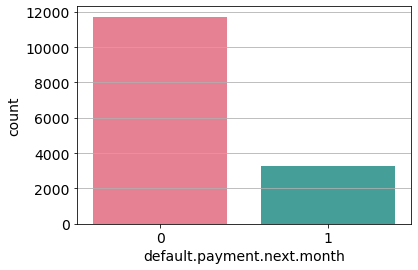

In [14]:
sns.countplot(credit['default.payment.next.month'], palette='husl')
plt.show()

The data has a significant imbalance with respect of the target value (default.payment.next.month).

- ### Treatment of categorical features

Treating the categorical features to introduce into the model

In [15]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
3,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
4,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [16]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE']

In [17]:
credit_dummies = pd.get_dummies(credit, columns = cat_features)

In [18]:
print("Default of Credit Card Clients data - rows:",credit_dummies.shape[0]," columns:", credit_dummies.shape[1])

Default of Credit Card Clients data -  rows: 15000  columns: 34


#### - ### seperate target and features

In [19]:
#Assigning and dividing the dataset
X = credit_dummies.drop(['default.payment.next.month'], axis=1)
y =  credit_dummies['default.payment.next.month']

- ### Create training and testing set

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [21]:
X_train.shape

(11250, 33)

In [22]:
X_test.shape

(3750, 33)

- ### Apply Logistic Regression

In [25]:
LogisticRegression?

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
print('Train Accuracy: ', classifier.score(X_train, y_train))
print('Test Accuracy: ', classifier.score(X_test, y_test))

Train Accuracy:  0.78
Test Accuracy:  0.7845333333333333


- #### Assessing Model performance
    - __Precision__: Percentage of correct results
    - __Recall__: Percentage of valid results correctly classified
    - __F1 Score__: A measure of test's accuracy which is harmonic mean of precision and recall. Maximising this improves the model. Perfect at 1 and worst at 0. 

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [32]:
y_pred = classifier.predict(X_test)

In [29]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

C:\Users\Apoorv\anaconda3\envs\edu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.784533,0.0,0.0,0.0


In [34]:
confusion_matrix(y_test, y_pred)

array([[2942,    0],
       [ 808,    0]], dtype=int64)

In [36]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,2942,0
Actual 1,808,0


- ### Apply SMOTE as data is unbalanced

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
sm = SMOTE(random_state=589)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print('new no. of rows: ', len(y_SMOTE))
print('old no. of rows: ', len(y_train))

new no. of rows:  17550
old no. of rows:  11250


In [39]:
classifier1 = LogisticRegression(max_iter=1000)
classifier1.fit(X_SMOTE, y_SMOTE)
print('Train Accuracy: ', classifier.score(X_SMOTE, y_SMOTE))
print('Test Accuracy: ', classifier.score(X_test, y_test))

Train Accuracy:  0.5
Test Accuracy:  0.7845333333333333


#### Getting Precision, Recall and F1 Score as well

In [40]:
y_pred1 = classifier1.predict(X_test)
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

model_results = pd.DataFrame([['Logistic Regression - with SMOTE', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.784533   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.548533   0.287157  0.738861  0.413578


In [41]:
confusion_matrix(y_test, y_pred1)

array([[1460, 1482],
       [ 211,  597]], dtype=int64)

In [43]:
pd.DataFrame(confusion_matrix(y_test, y_pred1), columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1460,1482
Actual 1,211,597


Accuracy has dipped but F1 score of the model has improved

- ### Apply Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
clf = DecisionTreeClassifier(random_state=14) 
clf.fit(X_SMOTE, y_SMOTE)
print('Train Accuracy: ', clf.score(X_SMOTE, y_SMOTE))
print('Test Accuracy: ', clf.score(X_test, y_test))

# Predicting Test Set
pred_dt = clf.predict(X_test)
acc = accuracy_score(y_test, pred_dt)
prec = precision_score(y_test, pred_dt)
rec = recall_score(y_test, pred_dt)
f1 = f1_score(y_test, pred_dt)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

Train Accuracy:  0.9998290598290598
Test Accuracy:  0.7125333333333334
                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.784533   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.548533   0.287157  0.738861  0.413578
2                     Decision Tree  0.712533   0.362525  0.440594  0.397765


- ### Apply Random Forest

In [46]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
print('Train Accuracy: ', clf_rf.score(X_SMOTE, y_SMOTE))
print('Test Accuracy: ', clf_rf.score(X_test, y_test))

# Predicting Test Set
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

Train Accuracy:  0.750940170940171
Test Accuracy:  0.8210666666666666
                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.784533   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.548533   0.287157  0.738861  0.413578
2                     Decision Tree  0.712533   0.362525  0.440594  0.397765
3               Random Forest(Gini)  0.821067   0.650549  0.366337  0.468725
Wall time: 5.72 s


In [47]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(criterion='entropy')
clf_rf.fit(X_train, y_train)

# Predicting Test Set
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.784533   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.548533   0.287157  0.738861  0.413578
2                     Decision Tree  0.712533   0.362525  0.440594  0.397765
3               Random Forest(Gini)  0.821067   0.650549  0.366337  0.468725
4            Random Forest(Entropy)  0.817867   0.640449  0.352723  0.454908


- ### Top 5 Features

> Random Forest

In [51]:
result_rf = pd.DataFrame({'features':X_train.columns,'score':clf_rf.feature_importances_.tolist()})
result_rf.sort_values(by=['score'], ascending= True).head(10)

,features,score
20,EDUCATION_0,0.000009
26,EDUCATION_6,0.000143
29,MARRIAGE_0,0.000227
25,EDUCATION_5,0.000717
24,EDUCATION_4,0.000818
32,MARRIAGE_3,0.001777
23,EDUCATION_3,0.008118
27,SEX_1,0.008913
28,SEX_2,0.009026
30,MARRIAGE_1,0.009406


- ### Applying  KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
%%time
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_SMOTE, y_SMOTE)
print('Train Accuracy: ', knn.score(X_SMOTE, y_SMOTE))
print('Test Accuracy: ', knn.score(X_test, y_test))

Train Accuracy:  0.7884330484330484
Test Accuracy:  0.6208
Wall time: 7.61 s


In [55]:
# Predicting Test Set N=10
pred_knn10= knn.predict(X_test)
acc = accuracy_score(y_test, pred_knn10)
prec = precision_score(y_test, pred_knn10)
rec = recall_score(y_test, pred_knn10)
f1 = f1_score(y_test, pred_knn10)

model_results = pd.DataFrame([['KNN-10 neigbours', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.784533   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.548533   0.287157  0.738861  0.413578
2                     Decision Tree  0.712533   0.362525  0.440594  0.397765
3               Random Forest(Gini)  0.821067   0.650549  0.366337  0.468725
4            Random Forest(Entropy)  0.817867   0.640449  0.352723  0.454908
5                  KNN-10 neigbours  0.620800   0.285315  0.504950  0.364611


#### <font color = darkorange>But KNN has a Linear component!

In [56]:
X_SMOTE.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,SEX_1,SEX_2,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,670000.0,28,0,0,0,0,0,0,88612.0,91137.0,99314.0,95292.0,63782.0,41114.0,5000.0,10000.0,4500.0,6000.0,1300.0,3000.0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,100000.0,42,0,0,0,0,0,-2,61618.0,60380.0,58567.0,79527.0,18950.0,19667.0,2406.0,2200.0,22004.0,656.0,1000.0,396.0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,70000.0,29,0,0,0,0,0,0,68540.0,64645.0,66460.0,46988.0,43530.0,44804.0,3000.0,3000.0,2000.0,2500.0,2000.0,2000.0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,150000.0,43,0,0,0,0,0,-2,17541.0,19021.0,7861.0,7691.0,0.0,0.0,2000.0,2000.0,2000.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,100000.0,48,-2,-2,-2,-2,-2,-2,2422.0,894.0,0.0,0.0,1639.0,923.0,894.0,0.0,0.0,1639.0,923.0,0.0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [57]:
continous_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
ss = StandardScaler()
X_SMOTE.loc[:, continous_cols] = ss.fit_transform(X_SMOTE.loc[:, continous_cols])
X_test.loc[:, continous_cols] = ss.transform(X_test.loc[:, continous_cols])

C:\Users\Apoorv\anaconda3\envs\edu\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [61]:
%%time
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_SMOTE, y_SMOTE)
print('Train Accuracy: ', knn3.score(X_SMOTE, y_SMOTE))
print('Test Accuracy: ', knn3.score(X_test, y_test))

Train Accuracy:  0.9156695156695157
Test Accuracy:  0.7376
Wall time: 42.4 s


In [62]:
%%time
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_SMOTE, y_SMOTE)
print('Train Accuracy: ', knn10.score(X_SMOTE, y_SMOTE))
print('Test Accuracy: ', knn10.score(X_test, y_test))

Train Accuracy:  0.8658689458689459
Test Accuracy:  0.7733333333333333
Wall time: 53.2 s


In [63]:
%%time
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(X_SMOTE, y_SMOTE)
print('Train Accuracy: ', knn20.score(X_SMOTE, y_SMOTE))
print('Test Accuracy: ', knn20.score(X_test, y_test))

Train Accuracy:  0.8366951566951567
Test Accuracy:  0.7784
Wall time: 55.5 s


In [64]:
# Predicting Test Set N=20
pred_knn20= knn20.predict(X_test)
acc = accuracy_score(y_test, pred_knn20)
prec = precision_score(y_test, pred_knn20)
rec = recall_score(y_test, pred_knn20)
f1 = f1_score(y_test, pred_knn20)

model_results = pd.DataFrame([['KNN-20 SS', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.784533   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.548533   0.287157  0.738861  0.413578
2                     Decision Tree  0.712533   0.362525  0.440594  0.397765
3               Random Forest(Gini)  0.821067   0.650549  0.366337  0.468725
4            Random Forest(Entropy)  0.817867   0.640449  0.352723  0.454908
5                  KNN-10 neigbours  0.620800   0.285315  0.504950  0.364611
6                         KNN-20 SS  0.778400   0.486455  0.511139  0.498491


---

- ### Apply Gaussian Naive Bayes

In [ ]:
%%time
gnb = GaussianNB()
gnb.fit(X_SMOTE, y_SMOTE)

In [ ]:
# Predicting Test Set
pred_gnb = gnb.predict(X_test)
acc = accuracy_score(y_test, pred_gnb)
prec = precision_score(y_test, pred_gnb)
rec = recall_score(y_test, pred_gnb)
f1 = f1_score(y_test, pred_gnb)

model_results = pd.DataFrame([['Gaussian Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

- ### Apply Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
model_bnb = BernoulliNB()
model_bnb.fit(X_SMOTE, y_SMOTE)

In [ ]:
# Predicting Test Set
pred_bnb = model_bnb.predict(X_test)
acc = accuracy_score(y_test, pred_bnb)
prec = precision_score(y_test, pred_bnb)
rec = recall_score(y_test, pred_bnb)
f1 = f1_score(y_test, pred_bnb)

model_results = pd.DataFrame([['Bernoulli Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

---

- ### Apply SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
%%time
model_svm = SVC()
model_svm.fit(X_SMOTE, y_SMOTE)
print('Train Accuracy: ', model_svm.score(X_SMOTE, y_SMOTE))
print('Test Accuracy: ', model_svm.score(X_test, y_test))

The model takes lot of time to run.  Hence caution before you run it

In [ ]:
%%time
model_svm = SVC(C = 0.1, gamma= 0.05)
model_svm.fit(X_SMOTE, y_SMOTE)
print('Train Accuracy: ', model_svm.score(X_SMOTE, y_SMOTE))
print('Test Accuracy: ', model_svm.score(X_test, y_test))

In [ ]:
# Predicting Test Set
predicted= model_svm.predict(X_test)

acc = accuracy_score(y_test, predicted)
prec = precision_score(y_test, predicted,zero_division=True)
rec = recall_score(y_test, predicted,zero_division=True)
f1 = f1_score(y_test, predicted,zero_division=True)

model_results = pd.DataFrame([['Support Vector Machine', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

---
---

- ### Which model fits the best?

- #### Check Best Accuracy

In [ ]:
plt.figure(figsize=(8,5))
max_acc_index= results.Accuracy.argmax()
plt.barh(results.Model, results.Accuracy, color='c')
plt.barh(results.Model[max_acc_index], results.Accuracy[max_acc_index], color='m')
plt.show()

- #### Check Best Precision

In [ ]:
plt.figure(figsize=(8,5))
max_pre_index= results.Precision.argmax()
plt.barh(results.Model,results.Precision,color='c')
plt.barh(results.Model[max_pre_index],results.Precision[max_pre_index],color='m')
plt.show()

- #### Check Best Recall

In [ ]:
plt.figure(figsize=(8,5))
max_rc_index= results.Recall.argmax()
plt.barh(results.Model,results.Recall,color='c')
plt.barh(results.Model[max_rc_index],results.Recall[max_rc_index],color='m')
plt.show()

- #### Best F1-Score

In [ ]:
plt.figure(figsize=(8,5))
max_f1_index= results['F1 Score'].argmax()
plt.barh(results.Model,results['F1 Score'], color='c')
plt.barh(results.Model[max_f1_index], results['F1 Score'][max_f1_index],color='m')
plt.show()

Based on accuracy Random Forest(Gini) is the best model. On considering other parameters of the model it is performing well.

<b><i>Conclusion</i></b>: In this demonstration of the case study, we have gained an understanding of how to apply various data pre-processing steps, apply SMOTE and different classification algorithms.